<a href="https://colab.research.google.com/github/superklex/Hamoye-externship/blob/master/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/superklex/my_datasets/master/energydata.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [4]:
df.shape

(19735, 29)

In [5]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
df1= df.drop(df.columns.difference(["T2", "T6"]), axis = 1)
df1

,T2,T6
0,19.200000,7.026667
1,19.200000,6.833333
2,19.200000,6.560000
3,19.200000,6.433333
4,19.200000,6.366667
...,...,...
19730,25.890000,24.796667
19731,25.754000,24.196667
19732,25.628571,23.626667
19733,25.414000,22.433333


In [8]:
#normalizing using the minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
x = df1.T2.to_numpy()
y = df1.T6.to_numpy()

In [9]:
#reshaping to change the array dimension
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
lin_model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#fit the model to the training dataset
lin_model.fit(x_train, y_train)
#obtain predictions
predicted = lin_model.predict(x_test)
print(predicted)

[[0.23928945]
 [0.46794238]
 [0.23108472]
 ...
 [0.3001772 ]
 [0.4297256 ]
 [0.3217686 ]]


In [11]:
#12 R squared value in 2dp
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted).round(2)
r2

0.64

Text(0.5, 1.0, 'R2: 0.64')

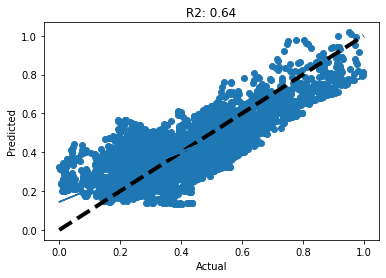

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.plot(y_test, lin_model.fit(y_test, predicted).predict(y_test))
ax.set_title("R2: " + str(r2))

In [13]:
#13 Mean Absolute error in 2dp
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, predicted).round(2)
mae

0.08

In [14]:
#14 Residual sum of squares in 2dp
rss= np.sum(np.square(y_test - predicted)).round(2)
rss

66.12

In [15]:
#15 Root mean squared error in 3 dp
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted)).round(3)
rmse

0.106

In [16]:
#16 Coefficient of  determination
from sklearn.metrics import r2_score
COD = r2_score(y_test, predicted).round(2)
COD

0.64

In [17]:
df2 = df.drop(["date","lights"], axis =1)
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
X = df2.drop("Appliances", axis =1)
Y = df2["Appliances"]
#.to_numpy()

In [18]:
line_model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#fit the model to the training dataset
line_model.fit(X_train, Y_train)
#obtain predictions
pred = line_model.predict(X_test)
print(pred)


[0.03322207 0.24411599 0.03400024 ... 0.06844707 0.10032325 0.05722198]


In [19]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  #weights = pd.DataFrame(data=df2, columns=['Features'])
  weights_df = pd.DataFrame(weights). reset_index()
  weights_df.columns = ["Features", col_name]
  weights_df[col_name].round(3)
  return weights_df
linear_model_weights = get_weights_df(line_model, X_train, "Linear_Model_Weight")
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [20]:
#Question 17
print("RH_1 and RH_2")

RH_1 and RH_2


In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge(alpha = 0.4)
ridge.fit(X_train, Y_train)
R_predict1= ridge.predict(X_train)
rmse1 = np.sqrt(mean_squared_error(Y_train, R_predict1)).round(2)
rmse1

0.09

In [23]:
ridge.fit(X_test, Y_test)
R_predict2= ridge.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(Y_test, R_predict2)).round(2)
rmse2

0.09

In [24]:
#Question 18
print("There is no change")

There is no change


In [25]:
#Question 19
from sklearn.linear_model import Lasso

In [26]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lasso_weights_df = get_weights_df(lasso, X_train, "Lasso_weight")
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [28]:
lasso_weights_df[lasso_weights_df['Lasso_weight'] != 0].count()

Features        4
Lasso_weight    4
dtype: int64

In [29]:
# four features have non zero weight

In [30]:
#Question 20
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(Y_test, lasso_pred)).round(3)
lasso_rmse

0.094

In [31]:
print("RMSE is unchanged")

RMSE is unchanged
